In [1]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('./personal_rc2.mplstyle')

In [2]:
data = load_iris()
names_map = {
    idx: name
    for idx,name in enumerate(data["target_names"])
}
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]
df["target"] = df["target"].map(names_map)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
tsne = TSNE().fit_transform(df.drop("target", axis=1))
tsne_df = pd.DataFrame(tsne, columns=["TSNE1", "TSNE2"])
tsne_df["target"] = df["target"]

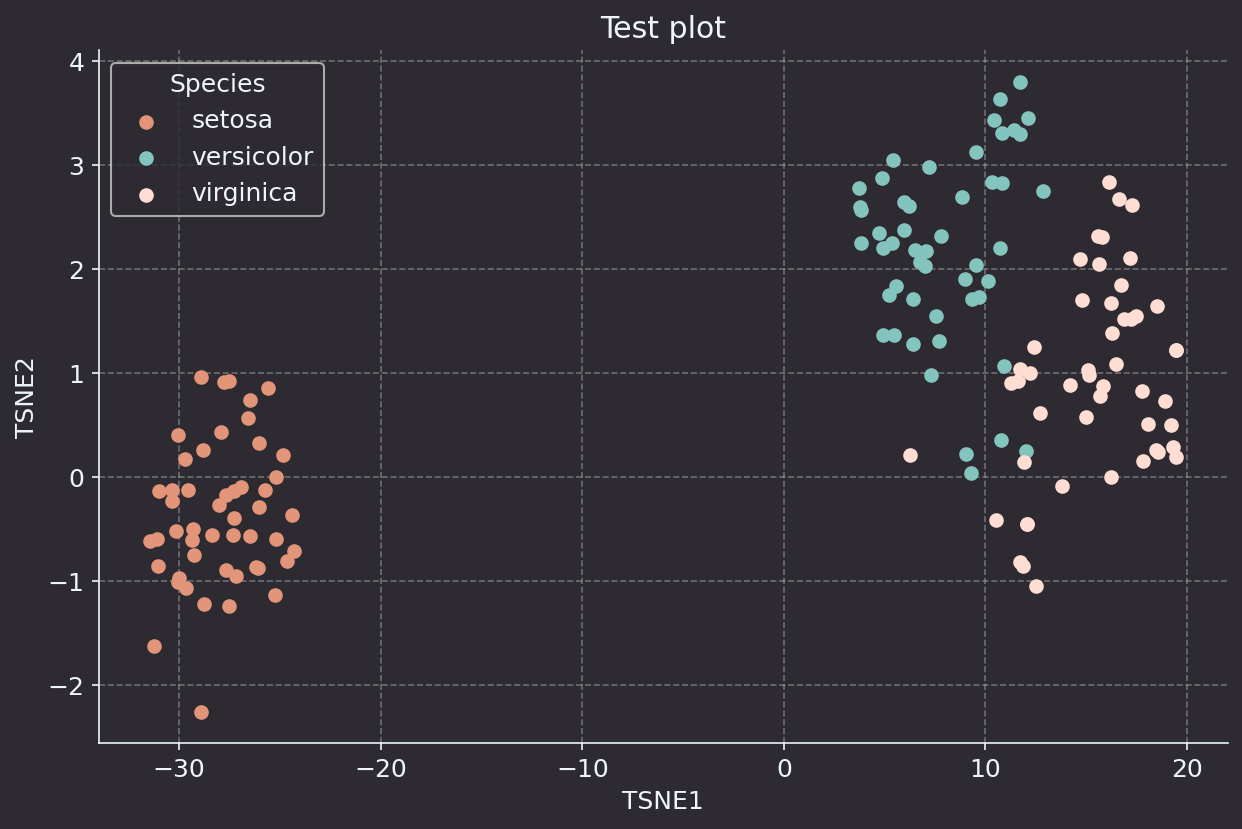

In [4]:
fig, ax = plt.subplots()
for name, grouped_df in tsne_df.groupby("target"):
    ax.scatter(grouped_df["TSNE1"], 
               grouped_df["TSNE2"], label=name)

ax.set(xlabel="TSNE1", ylabel="TSNE2", title="Test plot")
ax.legend(title="Species")
plt.show()